In [3]:
import utils 
from models.dnn import SMtNet
import pandas as pd
import numpy as np 
from scipy.stats import pearsonr 
import  torch as th
import seaborn as sns 

In [4]:
model = SMtNet.load_from_checkpoint("/home/ray/workspace/proj_fcst/notebook/checkpoints/2023-0404-1418_smultask/epoch=16-val_loss=3.867-train_loss=2.819.ckpt")

In [6]:
X_test=  utils.X_test
y_test = utils.y_test
model.eval()
y_test_pred_raw = model(th.tensor(X_test.values,dtype=th.float32))[0].detach().numpy()/1e2

In [7]:
y_test_pred_raw.shape

(2813980, 1)

In [9]:
y_test_pred = y_test_pred_raw
# y_test_pred2 = y_test_pred_raw[1]
y_test_pred2 = model(th.tensor(X_test.values,dtype=th.float32))[1].detach().numpy()/1e2

In [13]:
res = pd.DataFrame({'y1hat':y_test_pred.flatten(),'y2hat':y_test_pred2.flatten(),'y1':utils.df_test.y_1,'y2':utils.df_test.y_2})

In [14]:
res.corr()

,y1hat,y2hat,y1,y2
y1hat,1.000000,0.868664,0.067526,0.066812
y2hat,0.868664,1.000000,0.066653,0.066845
y1,0.067526,0.066653,1.000000,0.903380
y2,0.066812,0.066845,0.903380,1.000000


In [15]:
res.describe()

,y1hat,y2hat,y1,y2
count,2.813980e+06,2.813980e+06,2.813980e+06,2.813980e+06
mean,-2.291580e-04,-1.721029e-04,2.328628e-04,-8.751953e-05
std,2.767829e-03,2.513793e-03,2.839369e-02,2.560551e-02
min,-7.078099e-02,-5.830271e-02,-2.743507e-01,-2.828774e-01
25%,-1.000165e-03,-8.097039e-04,-1.420295e-02,-1.232679e-02
50%,3.412422e-05,1.263583e-04,-2.060175e-03,-2.143520e-03
75%,1.005776e-03,9.748709e-04,1.158118e-02,8.833844e-03
max,1.441949e-02,1.020915e-02,4.614886e-01,4.635121e-01


<AxesSubplot: ylabel='Frequency'>

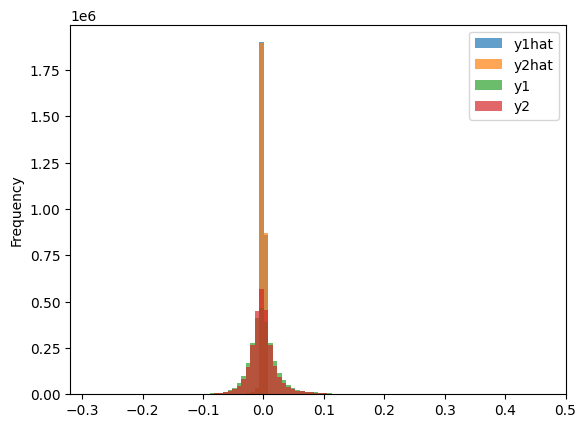

In [16]:
res.plot(kind='hist',bins=100,alpha=0.7)

In [18]:
mmt = utils.ModelMetrics(y_test_pred.flatten(),y_test,utils.test_date)
mmt.evaluate()

Information Coefficient: 0.5346
Average Returns of Top 10%: 0.0016
Accuracy of Top 10%: 0.1534


In [19]:
mmt2 = utils.ModelMetrics(y_test_pred2.flatten(),utils.df_test.y_1,utils.test_date)
mmt.evaluate()

Information Coefficient: 0.5346
Average Returns of Top 10%: 0.0016
Accuracy of Top 10%: 0.1534


In [20]:
df_metrics = pd.DataFrame(pd.DataFrame({"y_test":y_test,"y_test_pred":y_test_pred}))

ValueError: Per-column arrays must each be 1-dimensional

In [ ]:
df_metrics.describe()

In [ ]:
df_metrics['bench'] = utils.df_test.benchmark_yhat
df_metrics.plot(kind='scatter',x = 'y_test',y = 'bench',alpha=0.1)
df_metrics.plot(kind='scatter',x = 'y_test',y = 'y_test_pred',alpha=0.1)


In [ ]:
import matplotlib.pyplot as plt

In [ ]:

sns.histplot(df_metrics['y_test_pred'],bins=100,color='red')
# sns.histplot(df_metrics['y_test'],bins=100,alpha=0.5)
sns.histplot(df_metrics['bench'],bins=100,alpha=0.5)
plt.legend()

NameError: name 'df_metrics' is not defined

In [ ]:
sns.scatterplot(x=df_metrics.index,y=df_metrics['y_test_pred'],alpha=0.1)

In [ ]:
sns.scatterplot(x=df_metrics.index,y=df_metrics['y_test'],alpha=0.1)

In [ ]:
sns.scatterplot(x=df_metrics.index,y=utils.df_test.benchmark_yhat,alpha=0.1)